# Evaluating Fantasy Football Transactions

#### [Intoduction](#intro-bullet)
#### [Section 1: Importing and Cleaning Data](#first-bullet)
#### [Section 2: Calculating Fantasy Points](#second-bullet)
#### [Section 3: Player Usage as an Evaluation Metric](#third-bullet)
#### [Section 4: Comparing Players Across Positions - Value Over A Bench Player](#fourth-bullet)
#### [Section 5: Evaluating My Transactions](#fifth-bullet)

<a class="anchor" id="intro-bullet"></a>

# Introduction

I made a rookie mistake in one of my fantasy football leagues this year—I (unintentionally) auto drafted. My first four picks were Micheal Thomas, Miles Sanders, DeAndre Hopkins, and Kenny Golladay, respectively. Golladay started the season on IR, and Thomas swould soon join him after an injury in Week 1. This year, more than any other, I needed to improve my roster through trades and waiver pickups to remain competitive. Take a look at my post-draft roster:

| Starters |   |   |   |    | Bench |  |
| -------: | - | - | - | -- | -----: | - |
| Position | Player |   |   |   | Position | Player |
| QB | Aaron Rodgers |  |   |   | RB | David Johnson |
| RB | Miles Sanders |  |   |   | RB | D'Andre Swift |
| RB | Kareem Hunt |    |   |   | RB | Cam Akers |
| WR | Micheal Thomas | |   |   | WR | Kenny Golladay |
| WR | DeAndre Hopkins| |   |   | WR | Courtland Sutton |
| TE | Tyler Higbee |   |   |   | WR | Christian Kirk |
| FLEX | David Montgomery |||   | WR | Deebo Samuel |
| DEF | Chargers |      |   |   |  |  |
| K | Jake Elliott |

That is not a very impressive lineup! This is a standard league, and I did not have an elite back—the platform’s auto-draft algorithm selected Thomas with the 7th overall pick and left Derrick Henry on the board to be selected 8th. This workbook will describe and evaluate the transactions I've made throughout this season to upgrade my roster. Here is a preview of my current roster:

| Starters |   |   |   |    | Bench |  |
| -------: | - | - | - | -: | -----: | - |
| Position | Player |    |  |   | Position | Player |
| QB | Patrick Mahomes | |  |   | QB | Tua Tagovailoa |
| RB | Alvin Kamara |    |  |   | RB | Tony Pollard |
| RB | Aaron Jones |     |  |   | WR | Allen Robinson |
| WR | Kenny Golladay |  |  |   | WR | Robert Woods |
| WR | Justin Jefferson ||  |   | WR | Tyler Boyd |
| TE | Taysom Hill |     |  |   | WR | Ceedee Lamb |
| FLEX | Kareem Hunt |   |  |   | TE | Jonnu Smith |
| DEF | Saints |         |  |   | IR | Joe Mixon |
| K | Younghoe Koo | 

As you may have noted, Golladay and Hunt are the only drafted players that I have kept on my roster. While I’ve included the Defense and Kicker positions on the rosters above, those positions will not be referenced again in this notebook. I typically stream Defenses and Kickers, but I’ve held on to Younghoe Koo since he returned from injury in Week 7 (because he’s a beast).

I understand that there are a number of metrics that help forecast a player’s future performance (such as snap counts, air distance yards, red zone targets, etc.). However, not all of those metrics are covered in this workbook. The analysis in this workbook centers on player usage and fantasy points earned. 

**If you would like to skip over the technical information about data retrieval and formatting, you can start at section three.** Section one describes how I retrieve player statistics from online databases as well as how I  prepare that data for use in my player evaluations. Section two demonstrates how I apply the scoring system from my fantasy league to calculate each player’s current fantasy points. Section three explains why I believe a players usage metrics are a significant indicator of a player’s fantasy football performance. Section four illustrates how I compute the value of a baseline player for each position to more effectively compare players across positions. Section five chronicles my transactions throughout the season and evaluates the how those transactions effected the net value of my roster. 

<a class="anchor" id="first-bullet"></a>

# Section 1: Importing and Cleaning Data 

## A. Importing Libraries

I will be using the following libraries in this project:
- Matplotlib
- Numpy
- Pandas
- Seaborn

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nflfastpy as nfl
from IPython.display import display
import webarchive

pd.set_option('display.max_columns', None,
              'display.max_rows', None,
              'display.float_format', "{:,.2f}".format)

## B. Retrieving Data

I'll scrape official NFL statistics for the 2020 season from [Pro Football Reference](https://www.pro-football-reference.com/years/2020/fantasy.htm). (Pro Football Reference has been an invaluable resource both for NFL fantasy football coding and for winning bar arguments about who is the greatest player in NBA history). The dataset comprises the aggregated season-total player statistics and is updated after each weekly matchup. 

In [2]:
link = 'https://tinyurl.com/pfrstats'
df = pd.read_html(link, match='Rk')

df = df[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player                 Tm            FantPos   
0                  1   Derrick Henry *+                TEN                 RB   
1                  2     Alvin Kamara *                NOR                 RB   
2                  3       Dalvin Cook*                MIN                 RB   
3                  4     Travis Kelce*+                KAN                 TE   
4                  5    Davante Adams*+                GNB                 WR   

  Unnamed: 4_level_0 Games     Passing                Rushing                  \
                 Age     G  GS     Cmp Att Yds TD Int     Att   Yds   Y/A  TD   
0                 26    16  16       0   0   0  0   0     378  2027  5.36  17   
1                 25    15  10       0   0   0  0   0     187   932  4.98  16   
2                 25    14  14       0   0   0  0   0     312  1557  4.99  16   
3                 31    15  15       1   2   4  0   0       0     0   NaN   0   
4                 28    14  14       0   0   0  0   0       0     0   NaN   0   

  Receiving                       Fumbles    Scoring           Fantasy         \
        Tgt  Rec   Yds    Y/R  TD     Fmb FL      TD  2PM  2PP  FantPt    PPR   
0        31   19   114   6.00   0       3  2      17    1  NaN     314  333.1   
1       107   83   756   9.11   5       1  0      21  NaN  NaN     295  377.8   
2        54   44   361   8.20   1       5  3      17    3  NaN     294  337.8   
3       145  105  1416  13.49  11       1  1      11    1  NaN     208  312.8   
4       149  115  1374  11.95  18       1  1      18  NaN  NaN     243  358.4   

                                     
    DKPt   FDPt  VBD PosRank OvRank  
0  341.1  323.6  184       1      1  
1  383.8  336.3  165       2      2  
2  346.8  315.8  164       3      3  
3  316.8  260.3  117       1      4  
4  362.4  300.9  117       1      5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)       646 non-null    object
 1   (Unnamed: 1_level_0, Player)   646 non-null    object
 2   (Unnamed: 2_level_0, Tm)       646 non-null    object
 3   (Unnamed: 3_level_0, FantPos)  598 non-null    object
 4   (Unnamed: 4_level_0, Age)      646 non-null    object
 5   (Games, G)                     646 non-null    object
 6   (Games, GS)                    646 non-null    object
 7   (Passing, Cmp)                 646 non-null    object
 8   (Passing, Att)                 646 non-null    object
 9   (Passing, Yds)                 646 non-null    object
 10  (Passing, TD)                  646 non-null    object
 11  (Passing, Int)                 646 non-null    object
 12  (Rushing, Att)                 646 non-null    object
 13  (Rush

## C. Cleaning Data

The dataset has a number of values that I will not be using and needs to be properly formatted. I’ll drop the ``Fantasy`` columns, as I’ll be calculating fantasy points based on the scoring system for my league. I will rename the remaining columns and the convert the data type for the numerical columns from ``object`` to ``float``. During this process I will also categorize the columns by they type of statistic—biographical, passing, rushing, receiving, and miscellaneous—and assign each category to a separate variable for use in subsequent sections workbook. 

In [4]:
df.drop('Fantasy', axis=1, level=0, inplace=True)
df.columns = [''.join(col).strip() for col in df.columns.values]
df.columns

Index(['Unnamed: 0_level_0Rk', 'Unnamed: 1_level_0Player',
       'Unnamed: 2_level_0Tm', 'Unnamed: 3_level_0FantPos',
       'Unnamed: 4_level_0Age', 'GamesG', 'GamesGS', 'PassingCmp',
       'PassingAtt', 'PassingYds', 'PassingTD', 'PassingInt', 'RushingAtt',
       'RushingYds', 'RushingY/A', 'RushingTD', 'ReceivingTgt', 'ReceivingRec',
       'ReceivingYds', 'ReceivingY/R', 'ReceivingTD', 'FumblesFmb',
       'FumblesFL', 'ScoringTD', 'Scoring2PM', 'Scoring2PP'],
      dtype='object')

In [5]:
df.drop(
    ['Unnamed: 0_level_0Rk', 'Unnamed: 4_level_0Age', 'GamesGS', 'ScoringTD'], 
    axis=1, inplace=True)

df.rename(
    {'Unnamed: 1_level_0Player': 'Player', 
    'Unnamed: 2_level_0Tm': 'Tm',
    'Unnamed: 3_level_0FantPos': 'Pos', 
    'GamesG': 'G'}, 
    axis=1, inplace=True)

In [6]:
# removes repeated header rows
df = df.loc[df['G'] != 'G'].copy()

columns_bio = ['Player', 'Tm', 'Pos', 'G']

columns_pass = ['PassingCmp', 'PassingAtt', 'PassingYds', 'PassingTD', 'PassingInt']
columns_rush = ['RushingAtt', 'RushingYds', 'RushingY/A', 'RushingTD']
columns_rec = ['ReceivingTgt', 'ReceivingRec', 'ReceivingYds', 'ReceivingY/R', 'ReceivingTD'] 
columns_misc = ['FumblesFmb', 'FumblesFL', 'Scoring2PM', 'Scoring2PP']

columns_stats = columns_pass + columns_rush + columns_rec + columns_misc

for column in columns_stats:
    df[column] = df[column].astype(float)
    df[column] = df[column].fillna(0)

df['G'] = df['G'].astype(int)
df['G'] = df['G'].fillna(0)

df['Pos'] = df['Pos'].fillna('NA')
df = df.loc[df['Pos'] != 'NA'].copy()

In [7]:
df['Player'] = df['Player'].str.rstrip('+* ')
df['Name'] = df['Player'].str[0] + '.' +  df['Player'].str.split(' ', n=1).str.get(1)

In [8]:
df.head()

,Player,Tm,Pos,G,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name
0,Derrick Henry,TEN,RB,16,0.00,0.00,0.00,0.00,0.00,378.00,"2,027.00",5.36,17.00,31.00,19.00,114.00,6.00,0.00,3.00,2.00,1.00,0.00,D.Henry
1,Alvin Kamara,NOR,RB,15,0.00,0.00,0.00,0.00,0.00,187.00,932.00,4.98,16.00,107.00,83.00,756.00,9.11,5.00,1.00,0.00,0.00,0.00,A.Kamara
2,Dalvin Cook,MIN,RB,14,0.00,0.00,0.00,0.00,0.00,312.00,"1,557.00",4.99,16.00,54.00,44.00,361.00,8.20,1.00,5.00,3.00,3.00,0.00,D.Cook
3,Travis Kelce,KAN,TE,15,1.00,2.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,145.00,105.00,"1,416.00",13.49,11.00,1.00,1.00,1.00,0.00,T.Kelce
4,Davante Adams,GNB,WR,14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,149.00,115.00,"1,374.00",11.95,18.00,1.00,1.00,0.00,0.00,D.Adams


## Add 100 Yard Games

The scoring system for this league includes bonus points when a player reaches certain statistical thresholds: 100 yards rushing, 100 yards receiving, 300 yards passing, or 400 yards passing. I’ll import data for the games in which players have reached these thresholds from [The Football Database](https://www.footballdb.com/stats/index.html). I’ll then ``merge`` the bonus points column with our other statistics. 

In [9]:
# link_rush100 = 'https://tinyurl.com/fdbrush100'
# link_rec100 = 'https://tinyurl.com/fdbrec100'
# link_pass300 = 'https://tinyurl.com/fdbpass300'

link_rush100 = 'Rushing-100.webarchive'
link_rec100 = 'Receiving-100.webarchive'
link_pass300 = 'Passing-300.webarchive'

In [10]:
def bonus_yds(link, pts=5):
    save_as = link.strip('.webarchive') + '.html'
    
    archive = webarchive.open(link)
    archive.extract(save_as)
    
    bonus_weeks = pd.read_html(save_as)
    df_bonus = pd.DataFrame()
    for week in bonus_weeks:
        df_bonus = pd.concat([df_bonus, week])
        df_bonus = df_bonus.reset_index(drop=True)
        
    df_bonus['Player'] = df_bonus['Player'].str.rsplit('.', n=1).str.get(0)
    df_bonus['Player'] = df_bonus['Player'].str[:-1]
    df_bonus['Bonus'] = pts
    
    return df_bonus

In [11]:
df_rush100 = bonus_yds(link_rush100, 5)
df_rec100 = bonus_yds(link_rec100, 5)
df_pass300 = bonus_yds(link_pass300, 3)

df_pass400 = df_pass300.loc[df_pass300['Yds'] >= 400].copy()
df_pass300 = df_pass300.loc[df_pass300['Yds'] <= 400].copy()
df_pass400['Bonus'] = 2

In [12]:
bonus_list = [df_rush100, df_rec100, df_pass300, df_pass400]
columns = ['Player', 'Bonus']

df_bonus = pd.DataFrame()
for item in bonus_list:
    df_bonus = pd.concat([df_bonus, item])

df_bonus = df_bonus.reset_index()
df_bonus = df_bonus[columns]
df_bonus = df_bonus.groupby('Player', as_index=False).sum()

In [13]:
df = df.merge(df_bonus, how='left', on='Player')
df['Bonus'] = df['Bonus'].fillna(0)

<a class="anchor" id="second-bullet"></a>

# Section 2: Calculating Fantasy Points 

I will first create the dictionary ``scoring`` and assigned each value from my leagues scoring system to the appropriate key. I will then apply a function that calculates the fantasy points earned by each player. I prefer to look at per game rather than season total statistics when comparing players, so I will next convert each players season total statistics to average per game statistics. Finally, I will append a TD column that contains the sum of each player’s passing, rushing, and receiving touchdowns.  

In [14]:
scoring = {
    'PassingYds': 0.04,
    'PassingTD': 4,
    'PassingInt': -2,
    'RushingYds': 0.1,
    'RushingTD': 6,
    'ReceivingRec': 0.0,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'Scoring2PM': 2,
    'Scoring2PP': 2,
    'FumblesFL': -2
}

In [15]:
def inst_col(df=df, name=None, loc=None):
    if name not in df.columns:
        df.insert(loc, name, None)
        
    return df

In [16]:
def calc_pts(row, weights=scoring):
    
    games = row['G']
    
    points = sum([row[column] * weight for column, weight in weights.items()])
    
    return points

In [17]:
def calc_bonus(row):
    
    bonus = row['Bonus']
    points = row['Pts']
    games = row['G']
    
    bonus = bonus / games
    bonus = bonus + points
                
    return bonus

In [18]:
df = inst_col(df, 'Pts', 4)
df = inst_col(df, 'Pts+', 5)
df['Pts'] = df.apply(calc_pts, axis=1)
df['Pts+'] = df.apply(calc_bonus, axis=1)
df = df.sort_values(by='Pts', ascending=False)

In [19]:
def calc_avg(df, column):
    games = df['G']
    stat = df[column]
    
    stat = stat / games
    
    return stat

In [20]:
columns_avg = columns_stats
columns_avg.remove('RushingY/A')
columns_avg.remove('ReceivingY/R')

for c in columns_avg:
    df[c] = df.apply(calc_avg, column=c, axis=1)
    
df = inst_col(df, 'PPG', 4)
df['PPG'] = df['Pts'] / df['G']

In [21]:
df['TD'] = df['PassingTD'] + df['RushingTD'] + df['ReceivingTD']

In [22]:
df.head(20).sort_values(by='Pts', ascending=False)

,Player,Tm,Pos,G,PPG,Pts,Pts+,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name,Bonus,TD
6,Josh Allen,BUF,QB,16,24.69,395.06,396.62,24.75,35.75,284.00,2.31,0.62,6.38,26.31,4.13,0.50,0.06,0.06,0.75,12.00,0.06,0.56,0.38,0.00,0.00,J.Allen,25.00,2.88
7,Aaron Rodgers,GNB,QB,16,23.89,382.26,383.38,23.25,32.88,268.69,3.00,0.31,2.38,9.31,3.92,0.19,0.06,0.06,-0.38,-6.00,0.00,0.25,0.12,0.00,0.00,A.Rodgers,18.00,3.19
8,Kyler Murray,ARI,QB,16,23.67,378.74,379.55,23.44,34.88,248.19,1.62,0.75,8.31,51.19,6.16,0.69,0.00,0.00,0.00,0.00,0.00,0.56,0.25,0.00,0.00,K.Murray,13.00,2.31
9,Patrick Mahomes,KAN,QB,15,24.96,374.40,376.27,26.00,39.20,316.00,2.53,0.40,4.13,20.53,4.97,0.13,0.13,0.00,0.00,0.00,0.00,0.33,0.13,0.00,0.20,P.Mahomes,28.00,2.67
10,Deshaun Watson,HOU,QB,16,23.08,369.32,371.20,23.88,34.00,301.44,2.06,0.44,5.62,27.75,4.93,0.19,0.00,0.00,0.00,0.00,0.00,0.50,0.19,0.00,0.06,D.Watson,30.00,2.25
15,Russell Wilson,SEA,QB,16,22.49,359.78,360.72,24.00,34.88,263.25,2.50,0.81,5.19,32.06,6.18,0.12,0.00,0.00,0.00,0.00,0.00,0.44,0.25,0.00,0.06,R.Wilson,15.00,2.62
22,Ryan Tannehill,TEN,QB,16,21.46,343.36,343.92,19.69,30.06,238.69,2.06,0.44,2.69,16.62,6.19,0.44,0.06,0.06,0.00,0.00,0.00,0.38,0.06,0.12,0.06,R.Tannehill,9.00,2.50
24,Tom Brady,TAM,QB,16,21.12,337.92,339.42,25.06,38.12,289.56,2.50,0.75,1.88,0.38,0.20,0.19,0.00,0.00,0.00,0.00,0.00,0.25,0.06,0.00,0.00,T.Brady,24.00,2.69
28,Justin Herbert,LAC,QB,15,22.19,332.84,334.44,26.40,39.67,289.07,2.07,0.67,3.67,15.60,4.25,0.33,0.00,0.00,0.00,0.00,0.00,0.53,0.07,0.00,0.13,J.Herbert,24.00,2.40
29,Lamar Jackson,BAL,QB,15,22.19,332.78,333.78,16.13,25.07,183.80,1.73,0.60,10.60,67.00,6.32,0.47,0.00,0.00,0.00,0.00,0.00,0.67,0.27,0.00,0.07,L.Jackson,15.00,2.20


<a class="anchor" id="-bullet"></a>

# Section 3: Player Usage as an Evaluation Metric 

One metric that I like to use for assessing a player's fantasy value is usage—a player's aggregate number of pass attempts, rushing attempts, and receiving targets. While touchdowns are the most valuable statistic in fantasy, touchdowns can be a bit less predictable than how involved a player will be in a game. Generally, players who see more game action are more likely to score touchdowns. I tend to shy away from trading for players with high points but low volume.

In [23]:
df = inst_col(df, 'Usage', 6)
df['Usage'] = (df['PassingAtt'] + df['RushingAtt'] + df['ReceivingTgt']) 

I’ll use the Seaborn ``lmplot``  function to demonstrate the correlation between usage and fantasy points. As you’ll see, the two generally have a positive correlation. I go further in depth was to which metrics are the most predictive of future performance in a separate project. For this workbook, we’ll stick with usage. 

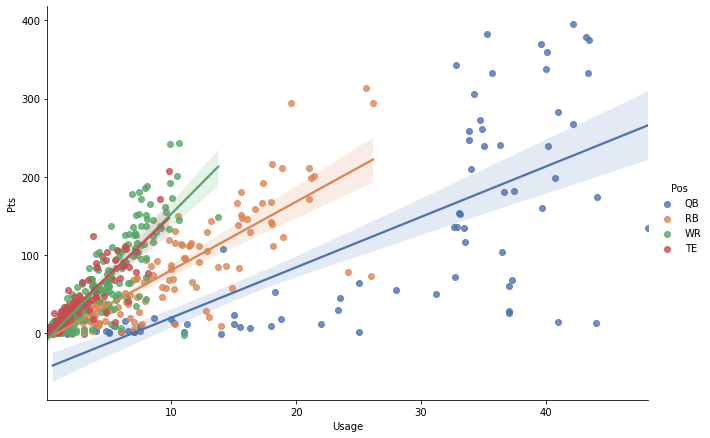

In [24]:
sns.lmplot(x='Usage', y='Pts', data=df, hue='Pos', palette='deep', height=6, aspect=1.5)

<a class="anchor" id="fourth-bullet"></a>

# Section 4: Comparing Players Across Positions - Value Over A Bench Player

## A. Distribution of the Total Player Pool

We can use the Seaborn `boxplot`  function to generate a visualization of how fantasy points are distributed amongst each position. 

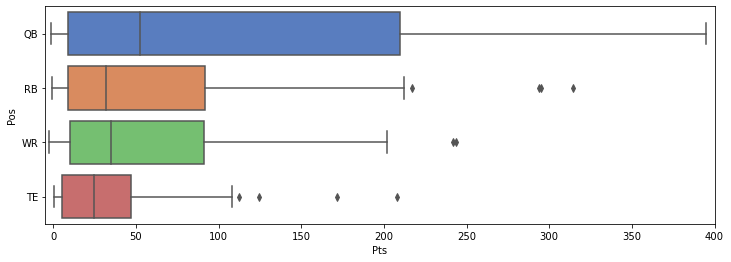

In [25]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(xlim=(-5, 400))
sns.boxplot(x='Pts', y='Pos', data=df, palette='muted');

# fig = plt.figure(figsize=(12, 4))
# fig.add_subplot(xlim=(-5, 400))
# sns.boxplot(x='Pts+', y='Pos', data=df, palette='muted');

In [26]:
df.groupby('Pos')['Pts'].describe()
# df.groupby('Pos')['Pts+'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,81.00,114.98,128.31,-1.52,9.02,52.28,209.48,395.06
RB,163.00,58.98,65.64,-1.00,9.05,31.90,91.80,314.10
TE,113.00,35.26,38.31,0.20,5.30,24.90,46.90,207.76
WR,221.00,55.27,54.82,-2.78,10.20,35.22,91.10,243.40


We can see that the distribution of fantasy points, across positions, is positively skewed—indicating that the leading scorer at each position earns substantially more points than a median scorer of the same position. With RBs, for instance, the majority of players at this position average fewer than four points per week, while the upper quartile averages more than 8 points per week. The distribution of points earned by players at the QB, WR, and TE positions follow similar patterns. These higher scoring players are the players we will focus on for our analysis. 

## B. Position Ranks

We can compare players of the same positions to one another by simply looking at each player’s average points. For instance, I know that Alvin Kamara (19.93 ppg through Week 10) has been producing better than has Josh Jacobs (14.34 ppg)  so far this season. Let’s start by adding position ranks and looking at the top ten RBs.

In [27]:
def pos_ranks(df):
    df = inst_col(df, 'Rk', 3)
    
    ranked = df.loc[df['Pos'] == 'NA'].copy()
    qb = df.loc[df['Pos'] == 'QB'].copy()
    rb = df.loc[df['Pos'] == 'RB'].copy()
    wr = df.loc[df['Pos'] == 'WR'].copy()
    te = df.loc[df['Pos'] == 'TE'].copy()
    
    positions = [qb, rb, wr, te]
    for p in positions:
        
        p = p.sort_values(by='Pts', ascending=False)
        p = p.reset_index(drop=True)
        p = p.reset_index()
        p['Rk'] = p['index'] + 1
        p['Rk'] = p['Pos'] + p['Rk'].astype(str)
        p = p.drop(['index'], axis=1)
        
        ranked = ranked.append(p)
    
    ranked.sort_values(by='Pts', ascending=False, inplace=True)
    ranked.reset_index(drop=True, inplace=True)
    
    return ranked

In [28]:
df = pos_ranks(df)

In [29]:
df.loc[df['Pos'] == 'QB'].head(10)

,Player,Tm,Pos,Rk,G,PPG,Pts,Usage,Pts+,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name,Bonus,TD
0,Josh Allen,BUF,QB,QB1,16,24.69,395.06,42.19,396.62,24.75,35.75,284.00,2.31,0.62,6.38,26.31,4.13,0.50,0.06,0.06,0.75,12.00,0.06,0.56,0.38,0.00,0.00,J.Allen,25.00,2.88
1,Aaron Rodgers,GNB,QB,QB2,16,23.89,382.26,35.31,383.38,23.25,32.88,268.69,3.00,0.31,2.38,9.31,3.92,0.19,0.06,0.06,-0.38,-6.00,0.00,0.25,0.12,0.00,0.00,A.Rodgers,18.00,3.19
2,Kyler Murray,ARI,QB,QB3,16,23.67,378.74,43.19,379.55,23.44,34.88,248.19,1.62,0.75,8.31,51.19,6.16,0.69,0.00,0.00,0.00,0.00,0.00,0.56,0.25,0.00,0.00,K.Murray,13.00,2.31
3,Patrick Mahomes,KAN,QB,QB4,15,24.96,374.40,43.47,376.27,26.00,39.20,316.00,2.53,0.40,4.13,20.53,4.97,0.13,0.13,0.00,0.00,0.00,0.00,0.33,0.13,0.00,0.20,P.Mahomes,28.00,2.67
4,Deshaun Watson,HOU,QB,QB5,16,23.08,369.32,39.62,371.20,23.88,34.00,301.44,2.06,0.44,5.62,27.75,4.93,0.19,0.00,0.00,0.00,0.00,0.00,0.50,0.19,0.00,0.06,D.Watson,30.00,2.25
5,Russell Wilson,SEA,QB,QB6,16,22.49,359.78,40.06,360.72,24.00,34.88,263.25,2.50,0.81,5.19,32.06,6.18,0.12,0.00,0.00,0.00,0.00,0.00,0.44,0.25,0.00,0.06,R.Wilson,15.00,2.62
6,Ryan Tannehill,TEN,QB,QB7,16,21.46,343.36,32.81,343.92,19.69,30.06,238.69,2.06,0.44,2.69,16.62,6.19,0.44,0.06,0.06,0.00,0.00,0.00,0.38,0.06,0.12,0.06,R.Tannehill,9.00,2.50
7,Tom Brady,TAM,QB,QB8,16,21.12,337.92,40.00,339.42,25.06,38.12,289.56,2.50,0.75,1.88,0.38,0.20,0.19,0.00,0.00,0.00,0.00,0.00,0.25,0.06,0.00,0.00,T.Brady,24.00,2.69
8,Justin Herbert,LAC,QB,QB9,15,22.19,332.84,43.33,334.44,26.40,39.67,289.07,2.07,0.67,3.67,15.60,4.25,0.33,0.00,0.00,0.00,0.00,0.00,0.53,0.07,0.00,0.13,J.Herbert,24.00,2.40
9,Lamar Jackson,BAL,QB,QB10,15,22.19,332.78,35.67,333.78,16.13,25.07,183.80,1.73,0.60,10.60,67.00,6.32,0.47,0.00,0.00,0.00,0.00,0.00,0.67,0.27,0.00,0.07,L.Jackson,15.00,2.20


In [30]:
df.loc[df['Pos'] == 'RB'].head(10)

,Player,Tm,Pos,Rk,G,PPG,Pts,Usage,Pts+,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name,Bonus,TD
10,Derrick Henry,TEN,RB,RB1,16,19.63,314.10,25.56,317.23,0.00,0.00,0.00,0.00,0.00,23.62,126.69,5.36,1.06,1.94,1.19,7.12,6.00,0.00,0.19,0.12,0.06,0.00,D.Henry,50.00,1.06
12,Alvin Kamara,NOR,RB,RB2,15,19.65,294.80,19.60,295.47,0.00,0.00,0.00,0.00,0.00,12.47,62.13,4.98,1.07,7.13,5.53,50.40,9.11,0.33,0.07,0.00,0.00,0.00,A.Kamara,10.00,1.40
13,Dalvin Cook,MIN,RB,RB3,14,20.99,293.80,26.14,296.66,0.00,0.00,0.00,0.00,0.00,22.29,111.21,4.99,1.14,3.86,3.14,25.79,8.20,0.07,0.36,0.21,0.21,0.00,D.Cook,40.00,1.21
25,Jonathan Taylor,IND,RB,RB4,15,14.45,216.80,18.07,217.80,0.00,0.00,0.00,0.00,0.00,15.47,77.93,5.04,0.73,2.60,2.40,19.93,8.31,0.07,0.07,0.07,0.00,0.00,J.Taylor,15.00,0.80
26,Aaron Jones,GNB,RB,RB5,14,15.14,211.90,18.86,212.97,0.00,0.00,0.00,0.00,0.00,14.36,78.86,5.49,0.64,4.50,3.36,25.36,7.55,0.14,0.14,0.00,0.00,0.00,A.Jones,15.00,0.79
27,David Montgomery,CHI,RB,RB6,15,14.05,210.80,21.00,211.80,0.00,0.00,0.00,0.00,0.00,16.47,71.33,4.33,0.53,4.53,3.60,29.20,8.11,0.13,0.07,0.07,0.07,0.00,D.Montgomery,15.00,0.67
31,James Robinson,JAX,RB,RB7,14,14.39,201.40,21.43,202.83,0.00,0.00,0.00,0.00,0.00,17.14,76.43,4.46,0.50,4.29,3.50,24.57,7.02,0.21,0.21,0.07,0.07,0.00,J.Robinson,20.00,0.71
33,Josh Jacobs,LVR,RB,RB8,15,13.22,198.30,21.20,198.97,0.00,0.00,0.00,0.00,0.00,18.20,71.00,3.90,0.80,3.00,2.20,15.87,7.21,0.00,0.13,0.13,0.00,0.00,J.Jacobs,10.00,0.80
34,Nick Chubb,CLE,RB,RB9,12,15.97,191.70,17.33,194.20,0.00,0.00,0.00,0.00,0.00,15.83,88.92,5.62,1.00,1.50,1.33,12.50,9.38,0.00,0.08,0.08,0.00,0.00,N.Chubb,30.00,1.00
39,Kareem Hunt,CLE,RB,RB10,16,11.28,180.50,15.56,180.81,0.00,0.00,0.00,0.00,0.00,12.38,52.56,4.25,0.38,3.19,2.38,19.00,8.00,0.31,0.12,0.00,0.00,0.00,K.Hunt,5.00,0.69


In [31]:
df.loc[df['Pos'] == 'WR'].head(10)

,Player,Tm,Pos,Rk,G,PPG,Pts,Usage,Pts+,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name,Bonus,TD
20,Davante Adams,GNB,WR,WR1,14,17.39,243.40,10.64,245.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.64,8.21,98.14,11.95,1.29,0.07,0.07,0.00,0.00,D.Adams,35.00,1.29
21,Tyreek Hill,KAN,WR,WR2,15,16.13,241.90,9.87,243.57,0.00,0.00,0.00,0.00,0.00,0.87,8.20,9.46,0.13,9.00,5.80,85.07,14.67,1.00,0.07,0.00,0.00,0.00,T.Hill,25.00,1.13
30,Stefon Diggs,BUF,WR,WR3,16,12.60,201.60,10.44,204.41,0.00,0.00,0.00,0.00,0.00,0.06,0.06,1.00,0.00,10.38,7.94,95.94,12.09,0.50,0.00,0.00,0.00,0.00,S.Diggs,45.00,0.50
35,Calvin Ridley,ATL,WR,WR4,15,12.77,191.50,9.87,194.17,0.00,0.00,0.00,0.00,0.00,0.33,0.07,0.20,0.00,9.53,6.00,91.60,15.27,0.60,0.07,0.07,0.07,0.00,C.Ridley,40.00,0.60
36,D.K. Metcalf,SEA,WR,WR5,16,11.77,188.30,8.06,189.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.06,5.19,81.44,15.70,0.62,0.06,0.06,0.00,0.00,D.Metcalf,25.00,0.62
37,Justin Jefferson,MIN,WR,WR6,16,11.64,186.20,7.88,188.39,0.00,0.00,0.00,0.00,0.00,0.06,0.12,2.00,0.00,7.81,5.50,87.50,15.91,0.44,0.06,0.00,0.12,0.00,J.Jefferson,35.00,0.44
41,Adam Thielen,MIN,WR,WR7,15,12.00,180.00,7.40,181.00,0.00,0.00,0.00,0.00,0.00,0.20,1.00,5.00,0.00,7.20,4.93,61.67,12.50,0.93,0.00,0.00,0.07,0.00,A.Thielen,15.00,0.93
42,Mike Evans,TAM,WR,WR8,16,11.16,178.60,6.81,180.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.81,4.38,62.88,14.37,0.81,0.00,0.00,0.00,0.00,M.Evans,25.00,0.81
44,DeAndre Hopkins,ARI,WR,WR9,16,10.80,172.80,10.06,174.99,0.00,0.00,0.00,0.00,0.00,0.06,0.06,1.00,0.00,10.00,7.19,87.94,12.23,0.38,0.19,0.12,0.00,0.00,D.Hopkins,35.00,0.38
47,A.J. Brown,TEN,WR,WR10,14,12.25,171.50,7.57,172.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.57,5.00,76.79,15.36,0.79,0.14,0.07,0.00,0.00,A.Brown,20.00,0.79


In [32]:
df.loc[df['Pos'] == 'TE'].head(10)

,Player,Tm,Pos,Rk,G,PPG,Pts,Usage,Pts+,PassingCmp,PassingAtt,PassingYds,PassingTD,PassingInt,RushingAtt,RushingYds,RushingY/A,RushingTD,ReceivingTgt,ReceivingRec,ReceivingYds,ReceivingY/R,ReceivingTD,FumblesFmb,FumblesFL,Scoring2PM,Scoring2PP,Name,Bonus,TD
29,Travis Kelce,KAN,TE,TE1,15,13.85,207.76,9.80,210.76,0.07,0.13,0.27,0.00,0.00,0.00,0.00,0.00,0.00,9.67,7.00,94.40,13.49,0.73,0.07,0.07,0.07,0.00,T.Kelce,45.00,0.73
46,Darren Waller,LVR,TE,TE2,16,10.73,171.60,9.06,173.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.06,6.69,74.75,11.18,0.56,0.12,0.12,0.06,0.00,D.Waller,25.00,0.56
93,Robert Tonyan,GNB,TE,TE3,16,7.79,124.60,3.69,124.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.69,3.25,36.62,11.27,0.69,0.00,0.00,0.00,0.00,R.Tonyan,0.00,0.69
108,Mark Andrews,BAL,TE,TE4,14,8.01,112.10,6.29,112.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.29,4.14,50.07,12.09,0.50,0.14,0.00,0.00,0.00,M.Andrews,0.00,0.50
114,T.J. Hockenson,DET,TE,TE5,16,6.77,108.30,6.38,108.30,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,6.31,4.19,45.19,10.79,0.38,0.06,0.06,0.06,0.00,T.Hockenson,0.00,0.38
117,Mike Gesicki,MIA,TE,TE6,15,7.09,106.30,5.67,106.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.67,3.53,46.87,13.26,0.40,0.00,0.00,0.00,0.00,M.Gesicki,5.00,0.40
121,Logan Thomas,WAS,TE,TE7,16,6.54,104.62,7.12,104.93,0.06,0.06,1.75,0.00,0.00,0.19,0.31,1.67,0.00,6.88,4.50,41.88,9.31,0.38,0.00,0.00,0.00,0.00,L.Thomas,5.00,0.38
122,Rob Gronkowski,TAM,TE,TE8,16,6.52,104.30,4.81,104.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.81,2.81,38.94,13.84,0.44,0.06,0.00,0.00,0.00,R.Gronkowski,5.00,0.44
129,Jonnu Smith,TEN,TE,TE9,15,6.61,99.20,4.47,99.20,0.00,0.00,0.00,0.00,0.00,0.13,0.27,2.00,0.07,4.33,2.73,29.87,10.93,0.53,0.00,0.00,0.00,0.00,J.Smith,0.00,0.60
137,Jimmy Graham,CHI,TE,TE10,16,5.85,93.60,4.75,93.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.75,3.12,28.50,9.12,0.50,0.06,0.00,0.00,0.00,J.Graham,0.00,0.50


In [33]:
# columns = ['Player', 'G', 'Rk', 'Pts', 'Pts+', 'RushingYds', 'ReceivingYds', 'TD']

# wow = df.loc[df['Pos'] == 'RB', columns] or 
# wow = inst_col(wow, 'ScrimmageYds', 6)
# wow['ScrimmageYds'] = wow['RushingYds'] + wow['ReceivingYds']
# wow = wow.sort_values(by='Pts+', ascending=False)
# wow = wow.loc[wow['Pts+'] > 6]
# # wow = wow.loc[wow['ScrimmageYds'] > 70]
# wow = wow.reset_index(drop=True)

# wow

In [34]:
# columns = ['Player', 'G', 'Rk', 'Pts', 'Pts+', 'Usage', 'TD']

# wow = df.loc[df['Pos'] != 'QB', columns]
# wow = wow.sort_values(by='Pts+', ascending=False)
# wow = wow.loc[wow['Pts+'] > 10]
# wow = wow.reset_index(drop=True)

# wow

## C. Value Over a Bench Player

So we can see that we probably shouldn’t trade Alvin Kamara for Josh Jacobs, but should we trade Kamara for Patrick Mahomes?  We would need a metric other than points per game  to determine if Mahomes has preformed better amongst QBs than Kamara has amongst RBs. We can calculate each players production relative to the best bench player of the same position. 

There are many more players available in the NFL than are viable starting options for fantasy football. My league is a 10-team league; our starting skill positions are QB, RB, RB, WR, WR, TE,  and FLEX. Seeing that each team has seven starting skill positions, we know that only  70 skill position players will be started across the league in any given week. We will need to narrow our pool of total players to the 70 best players. We will also need to include the best bench player at each position. 

While QBs are the highest scoring players in fantasy football, we, unfortunately, aren’t able to play a QB in every roster slot. There will only be 10 starting QBs across the league each week, and the same is true for TEs (since you should never have a TE in your flex spot unless you have both Travis Kelce and George Kittle, healthy, on your roster). We can included the top 11 QBs in our cutoff pool, 10 starters and the best bench player. We will do the same for TEs. We’ll leave the RB and WR positions together, since either can be in the flex position, and keep the best 51 WRRB players in our cutoff pool. 

In [35]:
def calc_cutoff(df):
    columns = ['Player', 'Pos', 'Rk', 'Pts', 'Usage']
    
    qb = df.loc[df['Pos'] == 'QB'].copy()
    qb = qb[:11]
    
    wrrb = df.loc[df['Pos'].isin(['RB', 'WR'])].copy()
    wrrb = wrrb[:51]
    
    te = df.loc[df['Pos'] == 'TE'].copy()
    te = te[:11]
    
    cutoff = qb
    cutoff = cutoff.append(wrrb)
    cutoff = cutoff.append(te)
    cutoff = cutoff.sort_values(by='Pts', ascending=False)
    cutoff = cutoff.reset_index(drop=True)
    cutoff = cutoff[columns]
    
    return cutoff

In [36]:
df_cutoffs = calc_cutoff(df)
df_cutoffs.tail(15)

,Player,Pos,Rk,Pts,Usage
58,JuJu Smith-Schuster,WR,WR23,137.10,8.00
59,Terry McLaurin,WR,WR24,136.80,9.07
60,Will Fuller,WR,WR25,135.90,6.91
61,Curtis Samuel,WR,WR26,135.10,9.20
62,Diontae Johnson,WR,WR27,133.80,9.80
63,Nyheim Hines,RB,RB24,130.20,10.31
64,Robert Tonyan,TE,TE3,124.60,3.69
65,Mark Andrews,TE,TE4,112.10,6.29
66,T.J. Hockenson,TE,TE5,108.30,6.38
67,Mike Gesicki,TE,TE6,106.30,5.67


If nothing else, the cutoff pool of players demonstrates that TEs as a collective score the fewest points of all starters. We can compare the distribution of fantasy points scored by players and the total pool to that of those in the cutoff pool.

In [37]:
df.groupby('Pos')['Pts'].describe()
df_cutoffs.groupby('Pos')['Pts'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,81.00,114.98,128.31,-1.52,9.02,52.28,209.48,395.06
RB,163.00,58.98,65.64,-1.00,9.05,31.90,91.80,314.10
TE,113.00,35.26,38.31,0.20,5.30,24.90,46.90,207.76
WR,221.00,55.27,54.82,-2.78,10.20,35.22,91.10,243.40


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,11.00,355.70,27.03,306.20,335.38,359.78,376.57,395.06
RB,24.00,184.74,51.65,130.20,147.25,166.80,203.75,314.10
TE,11.00,120.50,36.20,93.10,101.75,106.30,118.35,207.76
WR,27.00,164.11,30.03,133.80,141.25,152.90,179.30,243.40


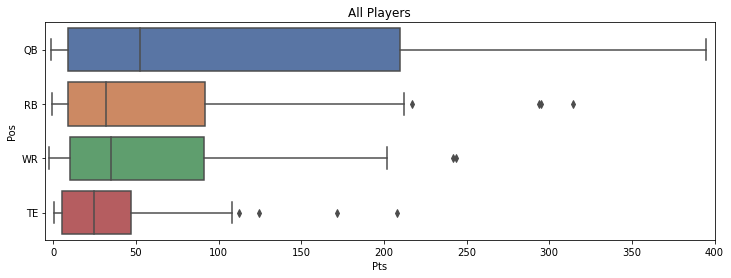

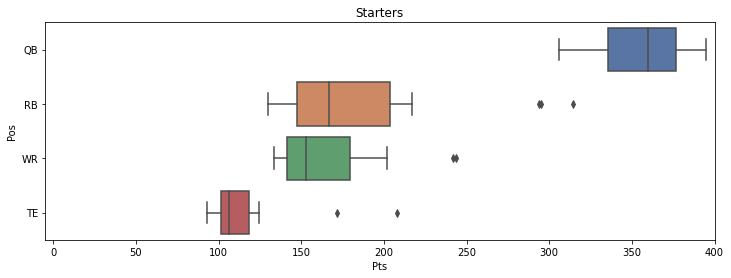

In [38]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(xlim=(-5, 400))
sns.boxplot(x='Pts', y='Pos', data=df, palette='deep').set_title('All Players')

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(xlim=(-5, 400))
sns.boxplot(x='Pts', y='Pos', data=df_cutoffs, palette='deep').set_title('Starters');

We can see that, across positions, the players in our cutoff pool outscore 75% of players at the same position in the general pool. The QBs in our cutoff pool all earn over 18 ppg, which is more than all but two players outside of the QB position. All but two TEs, on the other hand, score less than all players at any other position. 

We can run a few lines of code to pull the highest scoring bench player at each position—or the lowest scoring player at each position in our cutoff pool. 

In [39]:
positions = ['QB', 'RB', 'WR', 'TE']
replacement_players = {}
replacement_values = {}
replacement_usage = {}
replacement ={}

for _, row in df_cutoffs.iterrows():
    
    pos = row['Pos']
    player = row['Player']
    pts = row['Pts']
    usage = row['Usage']

    
    if pos in positions:
        replacement_players[pos] = player
        replacement_values[pos] = pts
        replacement_usage[pos] = usage

        replacement[pos] = [player, pts, usage]
        
replacement

{'QB': ['Kirk Cousins', 306.20000000000005, 34.25],
 'RB': ['Nyheim Hines', 130.2, 10.3125],
 'WR': ['Diontae Johnson', 133.8, 9.799999999999999],
 'TE': ['Hayden Hurst', 93.1, 5.5]}

In [40]:
df = inst_col(df, 'POB', 7)
df['POB'] = df.apply(
    lambda row: row['Pts'] - replacement_values.get(row['Pos']), axis=1
)

# df.head(10).sort_values(by='POB', ascending=False)

In [41]:
df = inst_col(df, 'POB/G', 5)
df['POB/G'] = df['POB'] / df['G']

In [42]:
df = inst_col(df, 'VOB', 8)
df = inst_col(df, 'VOB/G', 6)

df['VOB'] = df['POB'].apply(lambda x: (x - df['POB'].min()) / (df['POB'].max() - df['POB'].min()))
df['VOB/G'] = df['POB/G'].apply(lambda x: (x - df['POB/G'].min()) / (df['POB/G'].max() - df['POB/G'].min()))

# df.head(10).sort_values(by='VOB', ascending=False)

In [43]:
# df = inst_col(df, 'UOB', 9)
# df['UOB'] = df.apply(
#     lambda row: row['Usage'] - replacement_usage.get(row['Pos']), axis=1
# )

# df.head(10)

In [44]:
columns_vob = ['Player', 'G', 'Rk', 'PPG', 'POB/G', 'VOB/G', 'Pts', 'Pts+', 'POB', 'VOB', 'TD']
df_ranks = df[columns_vob].sort_values(by='VOB', ascending=False).reset_index(drop=True)
df_ranks.head(50)

,Player,G,Rk,PPG,POB/G,VOB/G,Pts,Pts+,POB,VOB,TD
0,Derrick Henry,16,RB1,19.63,11.49,1.00,314.10,317.23,183.90,1.00,1.06
1,Alvin Kamara,15,RB2,19.65,10.97,1.00,294.80,295.47,164.60,0.96,1.40
2,Dalvin Cook,14,RB3,20.99,11.69,1.00,293.80,296.66,163.60,0.96,1.21
3,Travis Kelce,15,TE1,13.85,7.64,0.99,207.76,210.76,114.66,0.86,0.73
4,Davante Adams,14,WR1,17.39,7.83,0.99,243.40,245.90,109.60,0.85,1.29
5,Tyreek Hill,15,WR2,16.13,7.21,0.99,241.90,243.57,108.10,0.85,1.13
6,Josh Allen,16,QB1,24.69,5.55,0.98,395.06,396.62,88.86,0.81,2.88
7,Jonathan Taylor,15,RB4,14.45,5.77,0.98,216.80,217.80,86.60,0.80,0.80
8,Aaron Jones,14,RB5,15.14,5.84,0.98,211.90,212.97,81.70,0.79,0.79
9,David Montgomery,15,RB6,14.05,5.37,0.98,210.80,211.80,80.60,0.79,0.67


# Section 5: Evaluating My Transactions


| Week | Transaction | 
|:---- | :---------- |
| Week 3 | Traded Aaron Rodgers, Michael Thomas, and Miles Sanders for </br>Patrick Mahomes, Aaron Jones and Robert Woods |
| Week 4 | Acquired Justin Jefferson from waivers |
| Week 6 | Acquired Chase Claypool from waivers |
| Week 7 | Traded DeAndre Hopkins, Chase Claypool, David Johnson, and </br>David Montgomery for Alvin Kamara |
| Week 8 | Acquired Tyler Boyd from waivers |
| Week 9 | Acquired Allan Lazard free agency |
| Week 10 | Acquired Todd Gurley and Allen Robinson from waivers |

I’ll first write a function to calculate the tradeoff value of players. 

In [62]:
def calc_tradeoff(trade_dict, df=df, sort_by='Pts'):
    columns = ['Player', 'G', 'Rk', 'PPG', 'Usage', 'TD', 'VOB/G', 'POB/G']
    
    for key in trade_dict:
        players = trade_dict[key]
        
        print(key)
        print('-' * 40)
        
        stats = pd.DataFrame()
        for p in players:
            p = df.loc[df['Player'] == p]
            stats = pd.concat([stats, p])
            
        stats = stats.sort_values(by=sort_by, ascending=False)
        stats = stats.reset_index(drop=True)
        stats.loc['Total'] = stats.sum(numeric_only=True)
        stats['G'] =  stats['G'].astype(int)
        stats.loc['Total', 'Player'] = '--'
        stats.loc['Total', 'G'] = '--'
        stats.loc['Total', 'Rk'] = '--'
        stats.loc['Total', 'VOB'] = '--'
        display(stats[columns])

## Week 1

Now let’s look at the value of my Week 1 roster. In additional to the players that \[auto]drafted, I also moved Deebo Samuel to IR and added Tim Patrick before Week 1 matchups. 

In [46]:
#     'QB': [],
#     'RB': ['Miles Sanders', 'Kareem Hunt', 'David Montgomery', 'David Johnson', 
#            "D'Andre Swift", 'Cam Akers'],
#     'WR': ['Micheal Thomas', 'DeAndre Hopkins', 'Kenny Golladay', 'Courtland Sutton', 
#            'Christian Kirk', 'Deebo Samuel'],
#     'TE': ['Tyler Higbee']

In [63]:
#using the optimal lineup rather than actual starter; to display true vaalue of roster
roster_wk1 = {
    'Starters' : ['Aaron Rodgers',  'Kareem Hunt', "D'Andre Swift", 'Miles Sanders',
                   'DeAndre Hopkins', 'Tyler Higbee', 'Christian Kirk'],
     'Bench' : [ 'Courtland Sutton', 'David Montgomery','David Johnson', 'Kenny Golladay', 
               'Deebo Samuel',  'Cam Akers', 'Michael Thomas', 'Tim Patrick']
}

calc_tradeoff(roster_wk1, sort_by='VOB')

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Rodgers,16,QB2,23.89,35.31,3.19,0.98,4.75
1,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
2,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
3,D'Andre Swift,13,RB20,11.06,13.15,0.77,0.97,1.05
4,Miles Sanders,12,RB21,11.87,18.00,0.50,0.97,1.02
5,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
6,Christian Kirk,14,WR51,7.03,5.79,0.43,0.96,-2.53
Total,--,--,--,81.54,101.94,6.28,6.77,9.28


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
2,Tim Patrick,15,WR40,7.35,5.27,0.40,0.96,-1.57
3,Cam Akers,13,RB42,6.98,12.23,0.23,0.95,-3.03
4,Deebo Samuel,7,WR97,6.81,7.43,0.14,0.92,-12.30
5,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
6,Michael Thomas,7,WR103,6.27,8.00,0.00,0.92,-12.84
7,Courtland Sutton,1,WR175,6.60,6.00,0.00,0.57,-127.20
Total,--,--,--,69.44,82.41,2.51,7.18,-167.82


## Week 2

In [64]:
roster_wk2 = {
    'Starters' : ['Aaron Rodgers',  'Kareem Hunt', 'Miles Sanders', 'DeAndre Hopkins', 
                  'Tyler Higbee', 'Kenny Golladay', "D'Andre Swift"],
    'Bench' : [ 'Courtland Sutton', 'David Montgomery', 'Deebo Samuel', 'Malcolm Brown', 
               'Michael Thomas', 'Marquez Valdes-Scantling', 'Nyheim Hines', 'David Johnson']
}

calc_tradeoff(roster_wk2)

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Rodgers,16,QB2,23.89,35.31,3.19,0.98,4.75
1,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
2,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
3,D'Andre Swift,13,RB20,11.06,13.15,0.77,0.97,1.05
4,Miles Sanders,12,RB21,11.87,18.00,0.50,0.97,1.02
5,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
6,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
Total,--,--,--,83.67,102.56,6.25,6.73,-5.80


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
2,Nyheim Hines,16,RB24,8.14,10.31,0.44,0.96,0.00
3,Marquez Valdes-Scantling,16,WR45,6.52,4.19,0.38,0.96,-1.84
4,Malcolm Brown,16,RB45,5.38,8.38,0.31,0.95,-2.76
5,Deebo Samuel,7,WR97,6.81,7.43,0.14,0.92,-12.30
6,Michael Thomas,7,WR103,6.27,8.00,0.00,0.92,-12.84
7,Courtland Sutton,1,WR175,6.60,6.00,0.00,0.57,-127.20
Total,--,--,--,65.98,81.39,2.60,7.24,-150.21


## Week 3

In [65]:
roster_wk3 = {
    'Starters': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'David Johnson',
                 'DeAndre Hopkins', 'Robert Woods', 'Tyler Higbee'],
    'Bench': ['David Montgomery', 'Jerick McKinnon', 'Keelan Cole', 'Kenny Golladay',
              'Devonta Freeman', 'Jonnu Smith', 'Joe Burrow', 'Deebo Samuel']
}
    
calc_tradeoff(roster_wk3)

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
3,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
4,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
5,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
6,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
Total,--,--,--,89.69,117.66,6.01,6.80,18.06


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,Joe Burrow,10,QB25,17.37,44.10,1.60,0.92,-13.25
2,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
3,Keelan Cole,16,WR54,5.90,5.56,0.31,0.96,-2.46
4,Jerick McKinnon,16,RB40,5.83,7.94,0.38,0.96,-2.31
5,Deebo Samuel,7,WR97,6.81,7.43,0.14,0.92,-12.30
6,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
7,Devonta Freeman,5,RB85,5.80,12.80,0.20,0.90,-20.24
Total,--,--,--,71.54,109.70,4.30,7.51,-62.38


In [66]:
trade1 = {
    'Traded': ['Miles Sanders', 'Michael Thomas'],
    'Aquired': ['Patrick Mahomes', 'Adam Thielen']
}

calc_tradeoff(trade1)

Traded
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Miles Sanders,12,RB21,11.87,18.00,0.50,0.97,1.02
1,Michael Thomas,7,WR103,6.27,8.00,0.00,0.92,-12.84
Total,--,--,--,18.14,26.00,0.50,1.89,-11.83


Aquired
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Adam Thielen,15,WR7,12.00,7.40,0.93,0.97,3.08
Total,--,--,--,36.96,50.87,3.60,1.95,7.63


In [67]:
trade2 = {
    'Traded': ['Aaron Rodgers', 'Adam Thielen'],
    'Aquired': ['Aaron Jones', 'Robert Woods'],
}

calc_tradeoff(trade2)

Traded
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Rodgers,16,QB2,23.89,35.31,3.19,0.98,4.75
1,Adam Thielen,15,WR7,12.00,7.40,0.93,0.97,3.08
Total,--,--,--,35.89,42.71,4.12,1.95,7.83


Aquired
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
1,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
Total,--,--,--,24.83,28.42,1.29,1.95,7.17


In [68]:
trade_one_two = { 
    'Traded': ['Miles Sanders', 'Michael Thomas', 'Aaron Rodgers'],
    'Aquired': ['Patrick Mahomes', 'Aaron Jones', 'Robert Woods'],
}

calc_tradeoff(trade_one_two)

Traded
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Rodgers,16,QB2,23.89,35.31,3.19,0.98,4.75
1,Miles Sanders,12,RB21,11.87,18.00,0.50,0.97,1.02
2,Michael Thomas,7,WR103,6.27,8.00,0.00,0.92,-12.84
Total,--,--,--,42.03,61.31,3.69,2.87,-7.07


Aquired
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
Total,--,--,--,49.79,71.89,3.95,2.93,11.71


In [69]:
roster = {
    'Before Trade' : ['Aaron Rodgers',  'Kareem Hunt', 'Miles Sanders', 'DeAndre Hopkins', 
                  'Tyler Higbee', 'David Johnson', 'Kenny Golladay'],
    'After Trade': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'David Johnson',
                 'DeAndre Hopkins', 'Robert Woods', 'Tyler Higbee']
}
calc_tradeoff(roster)

Before Trade
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Aaron Rodgers,16,QB2,23.89,35.31,3.19,0.98,4.75
1,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
2,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
3,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
4,Miles Sanders,12,RB21,11.87,18.00,0.50,0.97,1.02
5,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
6,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
Total,--,--,--,84.82,105.49,6.15,6.73,-5.48


After Trade
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
3,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
4,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
5,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
6,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
Total,--,--,--,89.69,117.66,6.01,6.80,18.06


## Week 3

## Week 4

In [70]:
roster_wk4 = {
    'Starters': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'David Johnson',
                 'DeAndre Hopkins',  'Justin Jefferson', 'Jonnu Smith'],
    'Bench': ['David Montgomery', 'Jerick McKinnon', 'Kenny Golladay', 'Tyler Higbee',
              'Devonta Freeman', 'Joe Burrow', 'Deebo Samuel', 'Robert Woods']
}
    
calc_tradeoff(roster_wk4)

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Justin Jefferson,16,WR6,11.64,7.88,0.44,0.97,3.27
3,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
4,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
5,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
6,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
Total,--,--,--,92.64,116.37,6.22,6.81,21.00


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,Joe Burrow,10,QB25,17.37,44.10,1.60,0.92,-13.25
2,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
3,Jerick McKinnon,16,RB40,5.83,7.94,0.38,0.96,-2.31
4,Tyler Higbee,15,TE16,5.61,4.07,0.33,0.96,-0.59
5,Deebo Samuel,7,WR97,6.81,7.43,0.14,0.92,-12.30
6,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
7,Devonta Freeman,5,RB85,5.80,12.80,0.20,0.90,-20.24
Total,--,--,--,74.33,113.30,4.22,7.52,-59.59


## Week 5

## Week 6

In [71]:
roster_wk6 = {
    'Starters': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'David Johnson',
                 'DeAndre Hopkins', 'Chase Claypool', 'Jonnu Smith'],
    'Bench': ['David Montgomery', 'Jerick McKinnon', 'Kenny Golladay', 'Robert Tonyan',
              'Henry Ruggs III', 'Justin Jefferson', 'Robert Woods']
}
    
calc_tradeoff(roster_wk6)

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
3,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
4,Chase Claypool,16,WR14,9.56,7.44,0.69,0.97,1.19
5,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
6,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
Total,--,--,--,90.55,115.94,6.47,6.80,18.92


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,Justin Jefferson,16,WR6,11.64,7.88,0.44,0.97,3.27
2,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
3,Robert Tonyan,16,TE3,7.79,3.69,0.69,0.97,1.97
4,Jerick McKinnon,16,RB40,5.83,7.94,0.38,0.96,-2.31
5,Henry Ruggs III,13,WR88,4.47,4.00,0.15,0.95,-5.82
6,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
Total,--,--,--,62.63,60.46,3.22,6.70,-13.79


## Week 7

In [72]:
trade3 = {
    'Traded': ['DeAndre Hopkins', 'David Montgomery', 'David Johnson', 'Chase Claypool'],
    'Aquired': ['Alvin Kamara'],
}

calc_tradeoff(trade3)

Traded
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,David Montgomery,15,RB6,14.05,21.00,0.67,0.98,5.37
1,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
2,Chase Claypool,16,WR14,9.56,7.44,0.69,0.97,1.19
3,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
Total,--,--,--,46.62,54.58,2.40,3.89,10.36


Aquired
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Alvin Kamara,15,RB2,19.65,19.60,1.40,1.00,10.97
Total,--,--,--,19.65,19.60,1.40,1.00,10.97


In [74]:
roster_wk7 = {
    'Starters': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'Alvin Kamara',
                 'Robert Woods', 'Justin Jefferson', 'Jonnu Smith'],
    'Bench': ['Jerick McKinnon', 'Kenny Golladay', 'Robert Tonyan',
              'Henry Ruggs III', 'Phillip Lindsay', 'Jamaal Williams', 'AJ Dillon']
}
    
calc_tradeoff(roster_wk7)

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Alvin Kamara,15,RB2,19.65,19.60,1.40,1.00,10.97
2,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
3,Justin Jefferson,16,WR6,11.64,7.88,0.44,0.97,3.27
4,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
5,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
6,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
Total,--,--,--,98.97,119.39,7.08,6.84,29.51


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Robert Tonyan,16,TE3,7.79,3.69,0.69,0.97,1.97
1,Jamaal Williams,14,RB38,6.86,11.00,0.21,0.96,-2.44
2,Jerick McKinnon,16,RB40,5.83,7.94,0.38,0.96,-2.31
3,Phillip Lindsay,11,RB61,5.36,12.00,0.09,0.94,-6.47
4,Henry Ruggs III,13,WR88,4.47,4.00,0.15,0.95,-5.82
5,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
6,AJ Dillon,11,RB76,3.48,4.36,0.18,0.94,-8.35
Total,--,--,--,42.95,49.39,2.10,6.62,-41.03


In [75]:
roster = {
    'Before Trade' : ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'David Johnson',
                      'DeAndre Hopkins', 'Chase Claypool', 'Jonnu Smith'],
    'After Trade': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'Alvin Kamara',
                    'Robert Woods', 'Justin Jefferson', 'Jonnu Smith']
}
calc_tradeoff(roster)

Before Trade
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
3,DeAndre Hopkins,16,WR9,10.80,10.06,0.38,0.97,2.44
4,Chase Claypool,16,WR14,9.56,7.44,0.69,0.97,1.19
5,David Johnson,12,RB19,12.21,16.08,0.67,0.97,1.36
6,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
Total,--,--,--,90.55,115.94,6.47,6.80,18.92


After Trade
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
1,Alvin Kamara,15,RB2,19.65,19.60,1.40,1.00,10.97
2,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
3,Justin Jefferson,16,WR6,11.64,7.88,0.44,0.97,3.27
4,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
5,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
6,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
Total,--,--,--,98.97,119.39,7.08,6.84,29.51


## Week 11

In [76]:
trade4 = {
    'Traded': ['Salvon Ahmed', 'Allen Lazard'],
    'Aquired': ['Joe Mixon', 'Ceedee Lamb'],
}

calc_tradeoff(trade4)

Traded
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Allen Lazard,10,WR74,6.48,4.80,0.30,0.94,-6.90
1,Salvon Ahmed,6,RB64,9.67,14.83,0.50,0.93,-12.03
Total,--,--,--,16.15,19.63,0.80,1.87,-18.93


Aquired
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Joe Mixon,6,RB49,13.10,24.17,0.67,0.94,-8.60
Total,--,--,--,13.10,24.17,0.67,0.94,-8.60


In [77]:
roster_wk11 = {
    'Starters': ['Patrick Mahomes', 'Aaron Jones', 'Kareem Hunt', 'Alvin Kamara',
                 'Robert Woods', 'Justin Jefferson', 'TE Taysom Hill'],
    'Bench': ['Kenny Golladay', 'Jonnu Smith', 'Tyler Boyd', 'Tony Pollard',
             'Allen Robinson', 'Tua Tagovailoa', 'Joe Mixon']
}
calc_tradeoff(roster_wk11, sort_by='POB')

Starters
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Alvin Kamara,15,RB2,19.65,19.60,1.40,1.00,10.97
1,Aaron Jones,14,RB5,15.14,18.86,0.79,0.98,5.84
2,Patrick Mahomes,15,QB4,24.96,43.47,2.67,0.98,4.55
3,Justin Jefferson,16,WR6,11.64,7.88,0.44,0.97,3.27
4,Kareem Hunt,16,RB10,11.28,15.56,0.69,0.97,3.14
5,Robert Woods,16,WR13,9.69,9.56,0.50,0.97,1.33
Total,--,--,--,92.36,114.92,6.48,5.87,29.11


Bench
----------------------------------------


,Player,G,Rk,PPG,Usage,TD,VOB/G,POB/G
0,Allen Robinson,16,WR12,10.06,9.50,0.38,0.97,1.69
1,Jonnu Smith,15,TE9,6.61,4.47,0.60,0.96,0.41
2,Tyler Boyd,15,WR38,7.58,7.80,0.27,0.96,-1.34
3,Tony Pollard,16,RB41,5.80,8.81,0.31,0.96,-2.34
4,Joe Mixon,6,RB49,13.10,24.17,0.67,0.94,-8.60
5,Kenny Golladay,5,WR100,9.16,6.40,0.40,0.91,-17.60
6,Tua Tagovailoa,10,QB30,13.55,32.60,1.40,0.91,-17.07
Total,--,--,--,65.85,93.75,4.02,6.60,-44.86


In [61]:
# df2 = nfl.load_pbp_data(2020)
# df2.head()